In [1]:
%display latex
Parallelism().set(nproc=4)

In [2]:
t = var("t")
us = list(var("x y"))#[function("x")(t), function("y")(t)]
k=0.8; b=0.6; c=0.3; e=0.05; f=2
x,y = us
vf = vector([b*x*(1-x) - c*x*(k-x)*y,
             -e*y*(1+y)+f*x*(k-x)*y])
v0 = [2.0, 1.0]

In [3]:
#ode = [diff(u,t) == v for u,v in zip(us,vf)]; ode

In [4]:
vf

(-0.300000000000000*x*(-x + 0.800000000000000)*y - 0.600000000000000*(x - 1)*x, 2*x*(-x + 0.800000000000000)*y - 0.0500000000000000*(y + 1)*y)

## Sample trajectory

In [5]:
ts = srange(0,50,0.5)
sol = desolve_odeint(vf, v0, ts, us,compute_jac=True)

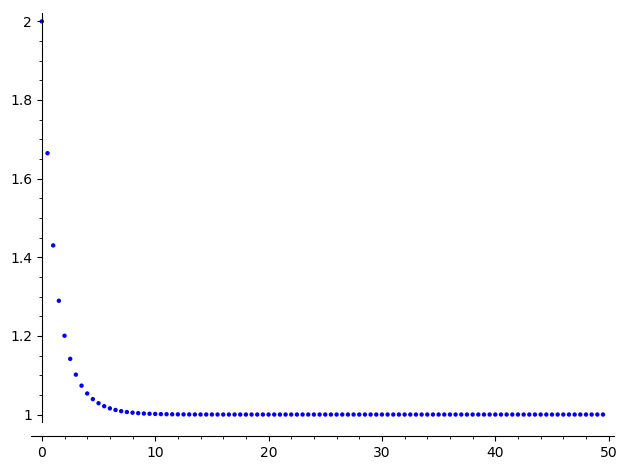

In [6]:
p = points(zip(ts,sol[:,0]))
p.show()

## Phase portrait 

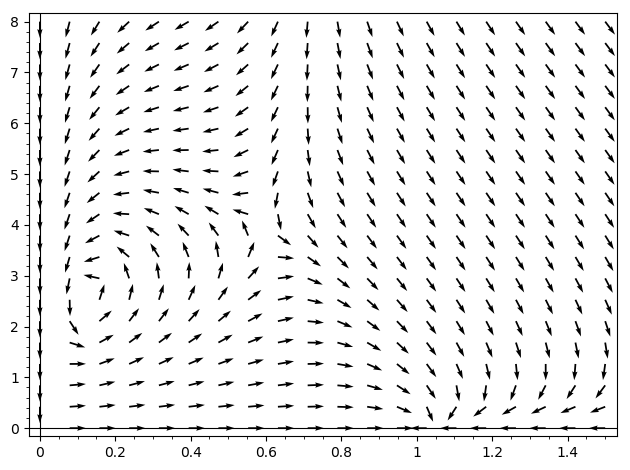

In [7]:
plot_vector_field(vf/vf.norm(),(x,0,1.5),(y,0,8))

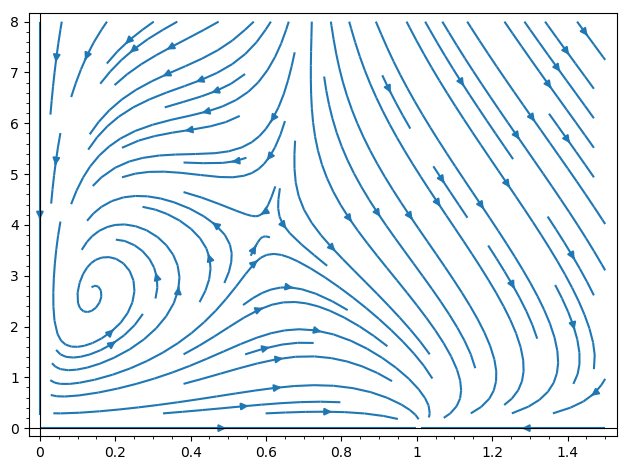

In [8]:
streamline_plot(tuple(vf),(x,0,1.5),(y,0,8))

## Nullclines

In [9]:
factsx,factsy = [[a for a,_ in v.factor_list() if a.variables()] for v in vf]
factsx,factsy

([5*x*y - 10*x - 4*y + 10, x], [40*x^2 - 32*x + y + 1, y])

In [10]:
equillib = [(d[x], d[y]) for d in
            solve([v == 0 for v in vf], us,solution_dict=True)
            if d[x] >= 0 and d[y] >= 0]

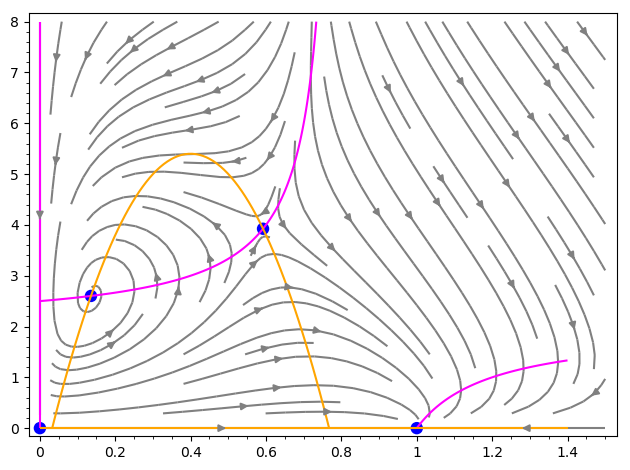

In [11]:
p = []
p.append(streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey"))
p.append(implicit_plot(factsx[0], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsx[1], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsy[0], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
p.append(implicit_plot(factsy[1], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
p.append(points(equillib,color="blue",size=80))
sum(p)

## Lie derivative computation

In [12]:
def Lie(f,n=1):
    if n == 0:
        return f
    elif n > 0:
        return Lie(f.gradient()*vf , n - 1)
    else:
        raise Exception()

## Plot of Lie derivatives

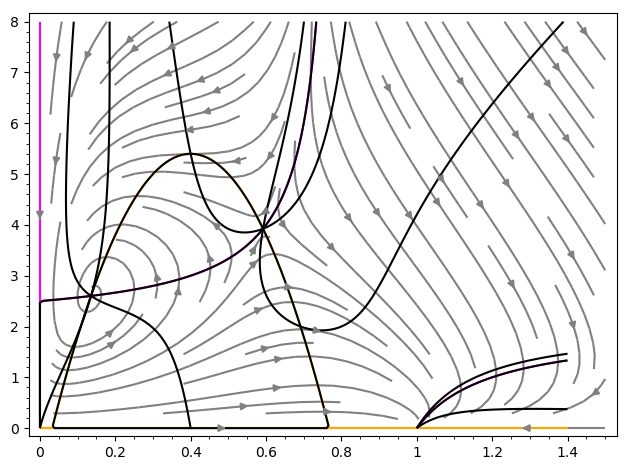

In [13]:
p = []
p.append(streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey"))
p.append(implicit_plot(factsx[0], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsx[1], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="magenta"))
p.append(implicit_plot(factsy[0], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
p.append(implicit_plot(factsy[1], (x,0,1.4), (y,0,8),
                       aspect_ratio='automatic',color="orange"))
for g in factsx + factsy:
    f(x,y) = g
    c = Lie(f)(x,y) == 0
    p.append(implicit_plot(c, (x,0,1.4), (y,0,8),
                           aspect_ratio='automatic',color="black"))
sum(p)

## Plot of higher Lie derivatives

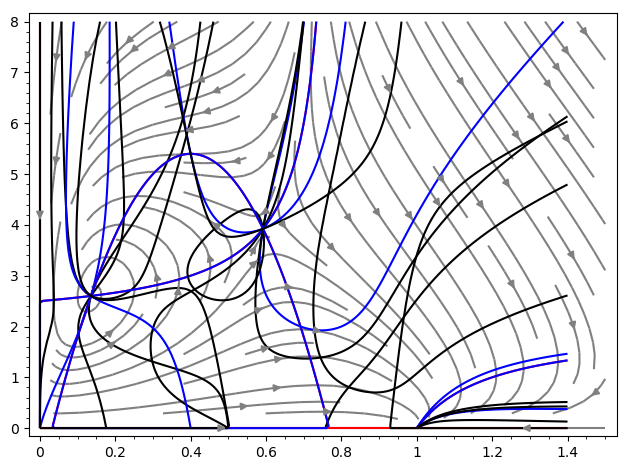

In [14]:
p = []
p.append(streamline_plot(tuple(vf),(x,0,1.5),(y,0,8),color="grey"))
for g in factsx + factsy:
    del f
    f(x,y) = g
    for n in range(3):
        c = Lie(f,n)(x,y) == 0
        col = ["red","blue","black"][n]
        p.append(implicit_plot(c, (x,0,1.4), (y,0,8),
                               aspect_ratio='automatic',color=col))
sum(p)

## Search for linear first integral via quantifier elimination

In [15]:
qf = qepcad_formula

In [16]:
a,b,c,d,e = var("a b c d e")

In [17]:
f(x,y) = a*x + b*y

In [18]:
Lie(f)(x,y)

(-0.300000000000000*x*(-x + 0.800000000000000)*y - 0.600000000000000*(x - 1)*x)*a + (2*x*(-x + 0.800000000000000)*y - 0.0500000000000000*(y + 1)*y)*b

In [19]:
F = qf.exists([a,b], a*x + b*y == 5*x)
qepcad(F, solution="any-point")

{'x': 1, 'y': 1}

In [20]:
(Lie(f)(x,y) == 0).solve([a,b])

[[a == r1, b == -6/5*(10*r1*x^2 - 10*r1*x - (5*r1*x^2 - 4*r1*x)*y)/((40*x^2 - 32*x + 1)*y + y^2)]]

In [21]:
g(x,y) = a*x + y

In [22]:
F = qf.exists(a, Lie(g)(x,y) == 0)
#qepcad(F)

In [23]:
qepcad(qf.exists(x, a*x^2 + b*x + c == 0))

4 a c - b^2 <= 0 /\ [ c = 0 \/ a /= 0 \/ 4 a c - b^2 < 0 ]

## Search for quadratic first integral

In [24]:
qf = qepcad_formula

In [25]:
a,b,c,d,e = var("a b c d e")

In [26]:
f(x,y) = a*x + b*y + c*x*y + d*x**2 + e*y**2

In [27]:
Lie(f)(x,y)

(2*x*(-x + 0.800000000000000)*y - 0.0500000000000000*(y + 1)*y)*(c*x + 2*e*y + b) + (-0.300000000000000*x*(-x + 0.800000000000000)*y - 0.600000000000000*(x - 1)*x)*(2*d*x + c*y + a)

In [28]:
F = qf.exists([a,b,c,d,e], Lie(f)(x,y) == 0)
#qepcad(F, solution="any-point")

## Example 39

In [29]:
var("x_1,x_2")

(x_1, x_2)

In [30]:
vf = vector([-2*x_2, -3*x_1**2 - 2*x_1]); vf

(-2*x_2, -3*x_1^2 - 2*x_1)

In [31]:
p(x_1,x_2) = x_1**3 + x_1**2 - x_2**2

In [32]:
p.gradient()

(x_1, x_2) |--> (3*x_1^2 + 2*x_1, -2*x_2)

In [33]:
def Lie(f,n=1):
    if n == 0:
        return f
    elif n > 0:
        return Lie(f.gradient()*vf , n - 1)
    else:
        raise Exception()

In [34]:
Lie(p)(x,y)

0

### Can QEPCAD find this first integral from a template?

In [35]:
a = var(["a_{}".format(i) for i in range(30)]); a

(a_0,
 a_1,
 a_2,
 a_3,
 a_4,
 a_5,
 a_6,
 a_7,
 a_8,
 a_9,
 a_10,
 a_11,
 a_12,
 a_13,
 a_14,
 a_15,
 a_16,
 a_17,
 a_18,
 a_19,
 a_20,
 a_21,
 a_22,
 a_23,
 a_24,
 a_25,
 a_26,
 a_27,
 a_28,
 a_29)

In [36]:
templ(x_1,x_2) = a_1*x_1**3 + a_2*x_1**2 + a_3*x_2**2

In [37]:
qf = qepcad_formula

In [38]:
Lie(templ)(x,y)

-2*(3*x^2 + 2*x)*a_3*y - 2*(3*a_1*x^2 + 2*a_2*x)*y

In [39]:
F = qf.forall([x_1,x_2], Lie(templ)(x_1,x_2) == 0); F

(A x_1)(A x_2)[-2 (3 x_1^2 + 2 x_1) a_3 x_2 - 2 (3 a_1 x_1^2 + 2 a_2 x_1) x_2 = 0]

In [40]:
q = qepcad(F); q

a2 - a1 = 0 /\ a3 + a1 = 0

In [41]:
cds = eval(str(q).replace("=","==").replace("a", "a_").replace("/\\",","))
cds

(-a_1 + a_2 == 0, a_1 + a_3 == 0)

In [42]:
solve(cds, [a_1,a_2,a_3])

[[a_1 == -r2, a_2 == -r2, a_3 == r2]]

In [43]:
b = [var(["b_{}{}".format(j,i) for i in range(4)]) for j in range(4)]
b

[(b_00, b_01, b_02, b_03),
 (b_10, b_11, b_12, b_13),
 (b_20, b_21, b_22, b_23),
 (b_30, b_31, b_32, b_33)]

In [44]:
b[2][3]

b_23

In [45]:
cubic(x_1,x_2) = sum([b[i][j]*x_1**i*x_2**j for i in range(4) for j in range(4)])
cubic

(x_1, x_2) |--> b_33*x_1^3*x_2^3 + b_32*x_1^3*x_2^2 + b_23*x_1^2*x_2^3 + b_31*x_1^3*x_2 + b_22*x_1^2*x_2^2 + b_13*x_1*x_2^3 + b_30*x_1^3 + b_21*x_1^2*x_2 + b_12*x_1*x_2^2 + b_03*x_2^3 + b_20*x_1^2 + b_11*x_1*x_2 + b_02*x_2^2 + b_10*x_1 + b_01*x_2 + b_00

In [46]:
F = qf.forall([x_1,x_2], Lie(cubic)(x_1,x_2) == 0); F

(A x_1)(A x_2)[-(3 b_33 x_1^3 x_2^2 + 2 b_32 x_1^3 x_2 + 3 b_23 x_1^2 x_2^2 + b_31 x_1^3 + 2 b_22 x_1^2 x_2 + 3 b_13 x_1 x_2^2 + b_21 x_1^2 + 2 b_12 x_1 x_2 + 3 b_03 x_2^2 + b_11 x_1 + 2 b_02 x_2 + b_01) (3 x_1^2 + 2 x_1) - 2 (3 b_33 x_1^2 x_2^3 + 3 b_32 x_1^2 x_2^2 + 2 b_23 x_1 x_2^3 + 3 b_31 x_1^2 x_2 + 2 b_22 x_1 x_2^2 + b_13 x_2^3 + 3 b_30 x_1^2 + 2 b_21 x_1 x_2 + b_12 x_2^2 + 2 b_20 x_1 + b_11 x_2 + b_10) x_2 = 0]

In [47]:
#q = qepcad(F); q

### Using first integral to find invarients

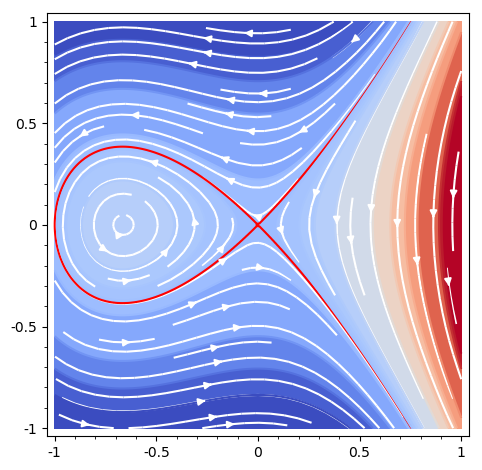

In [48]:
pl = Graphics()
pl += streamline_plot(tuple(vf),(x_1,-1,1),(x_2,-1,1),color="white")
pl += implicit_plot(p == 0,(x_1,-1,1),(x_2,-1,1),color="red")
pl += contour_plot(p,(x_1,-1,1),(x_2,-1,1), fill=True, cmap="coolwarm",
                   contours=[-0.7,-0.5,-0.3,-0.05,0.01,0.05,0.1,0.2,0.5,0.7,0.9,1.1,1.5,1.6])
#pl += implicit_plot(p == 0.06,(x_1,-1,1),(x_2,-1,1),color="yellow")
#for k in [0.3,0.7,2,3,4,5]:
#    pl += implicit_plot(p == k,(x_1,-1,1),(x_2,-1,1),color="yellow")
pl

In [49]:
(p == 0.5).solve([x_1,x_2])

[[x_1 == r3, x_2 == sqrt(r3^3 + r3^2 - 1/2)], [x_1 == r4, x_2 == -sqrt(r4^3 + r4^2 - 1/2)]]

### Singular locus

In [50]:
p(x_1,x_2).diff(x_1)

3*x_1^2 + 2*x_1

In [51]:
p.diff(x_1)(x_1,x_2)

3*x_1^2 + 2*x_1

In [52]:
F = qf.exists([x_1,x_2], qf.and_(p(x_1,x_2) == 0,
                                 p(x_1,x_2).diff(x_1) == 0,
                                 p(x_1,x_2).diff(x_2) == 0))
F

(E x_1)(E x_2)[x_1^3 + x_1^2 - x_2^2 = 0 /\ 3 x_1^2 + 2 x_1 = 0 /\ -2 x_2 = 0]

In [53]:
qepcad(F)

TRUE

In [54]:
def SL(p,xs):
    return solve([p == 0] + [d == 0 for d in p.gradient(xs)], xs)

In [55]:
SL(p(x_1,x_2), [x_1,x_2])

[[x_1 == 0, x_2 == 0]]

In [56]:
vf.substitute(x_1=0,x_2=0)

(0, 0)

There is no flow at the origin and hence by $\mathrm{Lie}^\circ$, $p = 0$ is an invarient set.

### Square free reduction

In [57]:
q = p(x_1,x_2).polynomial(QQ);q

x_1^3 + x_1^2 - x_2^2

In [58]:
p(x_1,x_2)/gcd([p(x_1,x_2), p(x_1,x_2).diff(x_1), p(x_1,x_2).diff(x_2)])

x_1^3 + x_1^2 - x_2^2

In [59]:
def SF(p):
    q = p.polynomial(QQ)
    return SR(q/gcd([q] + [d.polynomial(QQ) for d in p.gradient()]))

In [60]:
SF(p(x_1,x_2))

x_1^3 + x_1^2 - x_2^2

In [61]:
SF(x**2 - 6*x + 9)

x - 3

## Example 58

In [62]:
R.<x1,x2> = PolynomialRing(QQ); R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [63]:
xs = [x1,x2]

In [64]:
f = vector([3*(x1**2 - 4), 3 - x2**2 + x1*x2]); f

(3*x1^2 - 12, x1*x2 - x2^2 + 3)

In [65]:
def Lie(f,p,n=1):
    if n == 0:
        return p
    elif n > 0:
        grad = vector([R(d) for d in SR(p).gradient(xs)])
        return Lie(f, (grad*f), n - 1)
    else:
        raise Exception()

In [66]:
vector(map(SR,f))

(3*x1^2 - 12, x1*x2 - x2^2 + 3)

In [67]:
p = x2^4 + 2*x1*x2**3 + 6*x2**2 + 2*x1*x2 + x1**2 - 3; p

2*x1*x2^3 + x2^4 + x1^2 + 2*x1*x2 + 6*x2^2 - 3

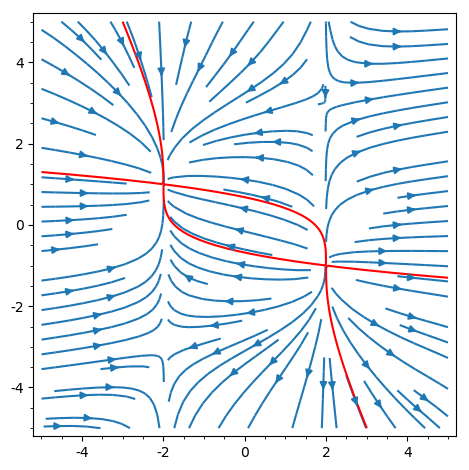

In [68]:
g = Graphics()
g += streamline_plot(map(SR,f),(x1,-5,5),(x2,-5,5))
g += implicit_plot(SR(p) == 0, (x1,-5,5),(x2,-5,5),color="red")
g

In [69]:
Lie(f,p)

12*x1^2*x2^3 - 2*x1*x2^4 - 4*x2^5 + 6*x1^3 + 8*x1^2*x2 + 28*x1*x2^2 - 24*x2^3 - 18*x1 + 12*x2

In [70]:
Lie(f,p).quo_rem(p)

(6*x1 - 4*x2, 0)

In [71]:
darboux = [x2**4-6*x2**2-4*x1*x2-3,
           x2**4+2*x1*x2**3+6*x2**2+2*x1*x2+x1**2-3,
           x1**2-4]
darboux

[x2^4 - 4*x1*x2 - 6*x2^2 - 3,
 2*x1*x2^3 + x2^4 + x1^2 + 2*x1*x2 + 6*x2^2 - 3,
 x1^2 - 4]

In [72]:
[Lie(f,q).quo_rem(q) for q in darboux]

[(4*x1 - 4*x2, 0), (6*x1 - 4*x2, 0), (6*x1, 0)]

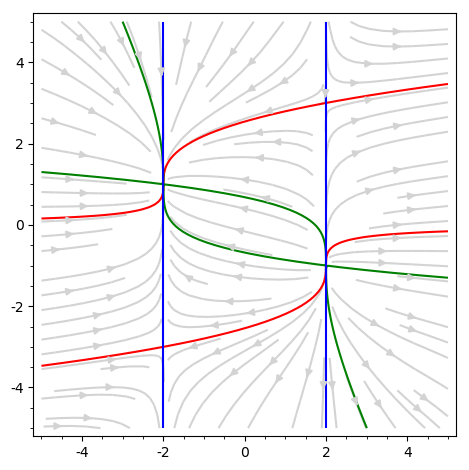

In [73]:
g = Graphics()
g += streamline_plot(map(SR,f),(x1,-5,5),(x2,-5,5), color="lightgrey")
colors = ["red","green","blue"]
for q,c in zip(darboux,colors):
    g += implicit_plot(SR(q) == 0, (x1,-5,5),(x2,-5,5),color=c)
g

We also have a rational first integral:

In [74]:
I = darboux[2] * darboux[0]**3 / darboux[1]**3

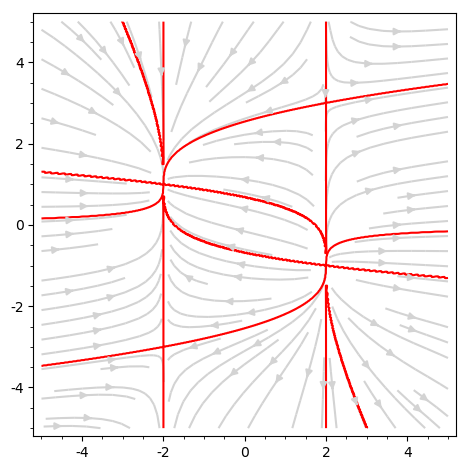

In [75]:
g = Graphics()
g += streamline_plot(map(SR,f),(x1,-5,5),(x2,-5,5), color="lightgrey")
g += implicit_plot(SR(I) == 0, (x1,-5,5),(x2,-5,5),color="red", plot_points = 700)
g

### Finding rational first integral via quantifier elimination

In [76]:
as_ =var("a1,a2,a3")

In [77]:
expr = sum(a*(Lie(f,d)/d) for a,d in zip(as_,darboux)); expr

2*a2*(3*x1 - 2*x2) + 4*a1*(x1 - x2) + 6*a3*x1

In [78]:
F = qf.forall(xs, expr == 0); F

(A x1)(A x2)[2 a2 (3 x1 - 2 x2) + 4 a1 (x1 - x2) + 6 a3 x1 = 0]

In [79]:
qff = qepcad(F); qff

a2 + a1 = 0 /\ 3 a3 + 3 a2 + 2 a1 = 0

In [80]:
import re

In [81]:
conjuncts = [eval(re.sub(r'([0-9]+) ([a-z])', r"\1*\2", e))
             for e in str(qff).replace("=", "==").split("/\\")]
conjuncts

[a1 + a2 == 0, 2*a1 + 3*a2 + 3*a3 == 0]

In [82]:
solve(conjuncts+[a3==1], as_)

[[a1 == 3, a2 == -3, a3 == 1]]

This implies that the first integral is indeed $I = J_3J_1^3J_2^{-3}$.

### Finding first integral via linear algebra

In [83]:
n = 2

In [84]:
darbouxrem = [Lie(f,d)//d for d in darboux];darbouxrem

[4*x1 - 4*x2, 6*x1 - 4*x2, 6*x1]

In [85]:
V = VectorSpace(QQ, n*n); V

Vector space of dimension 4 over Rational Field

In [86]:
darbouxrem[0].coefficients(), darbouxrem[0].monomials()

([4, -4], [x1, x2])

In [87]:
bs = [x1**i*x2**j for i in range(5) for j in range(5)]; bs

[1,
 x2,
 x2^2,
 x2^3,
 x2^4,
 x1,
 x1*x2,
 x1*x2^2,
 x1*x2^3,
 x1*x2^4,
 x1^2,
 x1^2*x2,
 x1^2*x2^2,
 x1^2*x2^3,
 x1^2*x2^4,
 x1^3,
 x1^3*x2,
 x1^3*x2^2,
 x1^3*x2^3,
 x1^3*x2^4,
 x1^4,
 x1^4*x2,
 x1^4*x2^2,
 x1^4*x2^3,
 x1^4*x2^4]

In [88]:
bv = dict((x1**i*x2**j, V.basis()[n*i + j])
          for i in range(n) for j in range(n))
bv

{1: (1, 0, 0, 0), x2: (0, 1, 0, 0), x1: (0, 0, 1, 0), x1*x2: (0, 0, 0, 1)}

In [89]:
def to_vect(p):
    return sum(c*bv[m] for c,m in zip(p.coefficients(), p.monomials()))

In [90]:
to_vect(darbouxrem[0])

(0, -4, 4, 0)

In [91]:
A = matrix(QQ, map(to_vect, darbouxrem)); A

[ 0 -4  4  0]
[ 0 -4  6  0]
[ 0  0  6  0]

In [92]:
A.kernel()

Vector space of degree 3 and dimension 1 over Rational Field
Basis matrix:
[  1  -1 1/3]

In [93]:
parent(darboux[0])

Multivariate Polynomial Ring in x1, x2 over Rational Field

### Finding quadratic Darboux polynomial by quantifier elimination

In [94]:
L.<a1,a2,a3> = QQ[]; L

Multivariate Polynomial Ring in a1, a2, a3 over Rational Field

In [95]:
R.<x1,x2> = L[];R

Multivariate Polynomial Ring in x1, x2 over Multivariate Polynomial Ring in a1, a2, a3 over Rational Field

In [96]:
def Lie(f,p,n=1):
    if n == 0:
        return p
    elif n > 0:
        return Lie(f, vector(p.gradient())*f, n - 1)
    else:
        raise Exception()

In [97]:
f = vector([3*(x1**2 - 4), 3 - x2**2 + x1*x2]); f

(3*x1^2 - 12, x1*x2 - x2^2 + 3)

In [98]:
templ = a1*x1^2+a2*x1*x2+a3*x2^2;templ

a1*x1^2 + a2*x1*x2 + a3*x2^2

In [99]:
L = Lie(f,templ); L

6*a1*x1^3 + 4*a2*x1^2*x2 + (-a2 + 2*a3)*x1*x2^2 + (-2*a3)*x2^3 + (-24*a1 + 3*a2)*x1 + (-12*a2 + 6*a3)*x2

In [100]:
var("b")

b

In [101]:
F = qf.exists(b,qf.forall([x1,x2], SR(L) == b*templ)); F

(E b)(A x1)(A x2)[6 a1 x1^3 + 4 a2 x1^2 x2 - (a2 - 2 a3) x1 x2^2 - 2 a3 x2^3 - 3 (8 a1 - a2) x1 - 6 (2 a2 - a3) x2 = (a1 x1^2 + a2 x1 x2 + a3 x2^2) b]

In [102]:
#qepcad(F)

In [103]:
#qepcad(F,solution="any-point")

## Example 62 (vector field)

In [104]:
M = Manifold(3,"M")
X.<x1,x2,x3> = M.chart()

In [105]:
v = M.vector_field("v")
v[:] = x2 + x3, 2*x1*x2 + 2*x1*x3, -x3**3 -x2*x3**2; v.display()

v = (x2 + x3) d/dx1 + (2*x1*x2 + 2*x1*x3) d/dx2 + (-x2*x3^2 - x3^3) d/dx3

In [106]:
p = M.scalar_field((x1*x3 + x3 - 1)**2 + (x2 - x1**2)**2, name="p")
p.display()

p: M --> R
   (x1, x2, x3) |--> (x1^2 - x2)^2 + (x1*x3 + x3 - 1)^2

In [107]:
expand(v(p)).display()

v(p): M --> R
   (x1, x2, x3) |--> -2*(x1^2 + 2*x1 + 1)*x3^4 - 2*((x1^2 + 2*x1 + 1)*x2 - 2*x1 - 2)*x3^3 + 2*(2*(x1 + 1)*x2 - 1)*x3^2 - 2*x2*x3

In [108]:
R.<px1,px2,px3> = QQ['x1','x2','x3']; R

Multivariate Polynomial Ring in x1, x2, x3 over Rational Field

In [109]:
def to_poly(sf):
    return R(sf.expr())

In [110]:
to_poly(v(p))

-2*x1^2*x2*x3^3 - 2*x1^2*x3^4 - 4*x1*x2*x3^3 - 4*x1*x3^4 + 4*x1*x2*x3^2 + 4*x1*x3^3 - 2*x2*x3^3 - 2*x3^4 + 4*x2*x3^2 + 4*x3^3 - 2*x2*x3 - 2*x3^2

In [111]:
def Lie(f,p,n=1):
    if n == 0: return p
    elif n > 0: return f(Lie(f,p,n-1))
    else: raise Exception()

### $p$ is not a a Darboux polynomial 

In [112]:
to_poly(Lie(v,p)) not in ideal(to_poly(p))

True

### $p$ satisfied dynamical radical invarient condition

In [113]:
L0,L1,L2 = [to_poly(Lie(v,p,n)) for n in range(3)]

In [114]:
L0

x1^4 + x1^2*x3^2 - 2*x1^2*x2 + 2*x1*x3^2 + x2^2 - 2*x1*x3 + x3^2 - 2*x3 + 1

In [115]:
L1

-2*x1^2*x2*x3^3 - 2*x1^2*x3^4 - 4*x1*x2*x3^3 - 4*x1*x3^4 + 4*x1*x2*x3^2 + 4*x1*x3^3 - 2*x2*x3^3 - 2*x3^4 + 4*x2*x3^2 + 4*x3^3 - 2*x2*x3 - 2*x3^2

In [116]:
L2

6*x1^2*x2^2*x3^4 + 14*x1^2*x2*x3^5 + 8*x1^2*x3^6 - 4*x1^3*x2*x3^3 - 4*x1^3*x3^4 + 12*x1*x2^2*x3^4 + 28*x1*x2*x3^5 + 16*x1*x3^6 - 8*x1^2*x2*x3^3 - 12*x1*x2^2*x3^3 - 8*x1^2*x3^4 - 28*x1*x2*x3^4 + 6*x2^2*x3^4 - 16*x1*x3^5 + 14*x2*x3^5 + 8*x3^6 + 8*x1^2*x2*x3^2 + 8*x1^2*x3^3 - 4*x1*x2*x3^3 - 12*x2^2*x3^3 - 4*x1*x3^4 - 28*x2*x3^4 - 16*x3^5 + 8*x1*x2*x3^2 + 6*x2^2*x3^2 + 8*x1*x3^3 + 14*x2*x3^3 + 8*x3^4 - 4*x1*x2*x3 - 4*x1*x3^2

In [117]:
I = ideal([L0,L1]);I

Ideal (x1^4 + x1^2*x3^2 - 2*x1^2*x2 + 2*x1*x3^2 + x2^2 - 2*x1*x3 + x3^2 - 2*x3 + 1, -2*x1^2*x2*x3^3 - 2*x1^2*x3^4 - 4*x1*x2*x3^3 - 4*x1*x3^4 + 4*x1*x2*x3^2 + 4*x1*x3^3 - 2*x2*x3^3 - 2*x3^4 + 4*x2*x3^2 + 4*x3^3 - 2*x2*x3 - 2*x3^2) of Multivariate Polynomial Ring in x1, x2, x3 over Rational Field

In [118]:
L2 in I

True

In [119]:
L2.lift(I)

[0, -3*x2*x3 - 4*x3^2 + 2*x1]

In [120]:
vector(L2.lift(I))*vector([L0,L1]) == L2

True

## $\mathrm{DRI}$ decision procedure

In [121]:
def drim(f,p,N):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = [p]
    Lp = [to_poly(p)]
    for n in range(1,N+1):
        L.append(f(L[-1]))
        Lp.append(to_poly(L[-1]))
        I = R.ideal(Lp[:-2])
        if Lp[-1] in I:
            return n
    return False

In [122]:
dri(v,p,4)

NameError: name 'dri' is not defined

### Example 63

In [ ]:
M = Manifold(2, "M")
X.<x1,x2> = M.chart()
v = M.vector_field()
v[:] = x2, x1
R.<px1,px2> = QQ['x1', 'x2']
v.display()

In [ ]:
p = M.scalar_field(x1**2 + x2**2); p.display()

In [ ]:
v.plot(ranges={x1: (-10,10), x2: (-10,10)}, arrowsize=4, scale=0.25)

In [ ]:
streamline_plot(list(v), (x1,-10,10), (x2,-10,10))

In [ ]:
dri(v,p,5)

The scalar field $p$ encodes the point $(0,0)$ as $\ker p = p^{-1}(0) = \{0\}$. Therefore, this shows the origin is invariant.

### Polynomial only

In [ ]:
def dri(f,p,N):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = []
    for n in range(0,N+1):
        d = vector(d.gradient())*f if n > 0 else p
        if d in R.ideal(L):
            return n
        L.append(d)
    return False

In [ ]:
R.<x1,x2> = QQ[]; R

In [ ]:
f = vector([x2,x1]); f

In [ ]:
p = x1**2 + x2**2

In [ ]:
dri(f,p,4)

## $\mathrm{DRI}_{\wedge}$ decision procedure

The improved decision procedure for a conjunction $p_1 \wedge p_2 \wedge \ldots \wedge p_k$, consists of checking whether $\mathcal L^N_f(p_i) \in I$ for some $N$, where,
$$
I = \langle
p_1,\ldots,p_k,
\mathcal L_f(p_1),\ldots, \mathcal L_f(p_k),
\ldots
\mathcal L_f^{N-1}(p_1),\ldots, \mathcal L_f^{N-1}(p_k)
\rangle
$$
and also that we have the inclusion,
$$
\mathcal V_{\mathbb R}(p_1,\ldots,p_k) \subseteq \mathcal V_{\mathbb R}(I).
$$
(this is checked via Quantifier Elimination)

### Manual check

In [ ]:
ps = [M.scalar_field(x1), M.scalar_field(x2)]
Ps = list(map(to_poly, ps))
Ps

In [ ]:
Ls = [to_poly(v(p)) for p in ps]
Ls

In [ ]:
LLs = [to_poly(v(v(p))) for p in ps]
LLs

In [ ]:
ips = [Ps[0],Ps[1],to_poly(v(ps[0])),to_poly(v(ps[1]))]

In [ ]:
I = R.ideal(ips); I

In [ ]:
all(p in I for p in LLs)

In [ ]:
F = qf.forall([x1,x2],
              qf.implies(qf.and_(SR(Ps[0]) == 0, SR(Ps[1]) == 0),
                         qf.and_(*(SR(i) == 0 for i in ips))))
F

In [ ]:
qepcad(F) == "TRUE"

### General procedure

In [ ]:
def dri2m(f,ps,xs,N,verbose=True):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = [ps]
    Lp = [list(map(to_poly, ps))]
    for n in range(1,N+1):
        L.append(list(map(v, L[-1])))
        Lp.append(list(map(to_poly,L[-1])))
        ips = sum(Lp[:-2], [])
        I = R.ideal(ips)
        if verbose:
            print "L[{}] = {}".format(n,Lp[-1])
            print "I = <{}>".format(ips)
        if all(p in I for p in Lp[-1]):
            if verbose:
                print "Lie derivatives in ideal for n = {}".format(n)
            F = qf.forall(xs,
                  qf.implies(qf.and_(*(p.expr() == 0 for p in ps)),
                             qf.and_(*(SR(i) == 0 for i in ips))))
            if qepcad(F) == "TRUE":
                 return n
    return False

### Example 63

In [ ]:
dri2m(v, [M.scalar_field(x1), M.scalar_field(x2)], [x1,x2], 5)

### Polynomial only

In [ ]:
def dri2(f,ps,N,verbose=True):
    '''Given a vector field f and a scalar field p, try to prove p is
    invarient under f, in at most N steps of the DRI rule. If successful,
    return the n required, otherwise, return False.'''
    L = []
    xs = ps[0].parent().gens()
    for n in range(0,N+1):
        ds = [vector(d.gradient())*f for d in ds] if n > 0 else ps
        ips = sum(L, [])
        I = R.ideal(ips)
        if verbose:
            print "L[{}] = {}".format(n,ds)
            print "I = <{}>".format(ips)
        if all(d in I for d in ds):
            if verbose:
                print "Lie derivatives in ideal for n = {}".format(n)
            F = qf.forall(xs,
                  qf.implies(qf.and_(*(SR(p) == 0 for p in ps)),
                             qf.and_(*(SR(i) == 0 for i in ips))))
            if qepcad(F) == "TRUE":
                 return n
        L.append(ds)
    return False

In [ ]:
R.<x1,x2> = QQ[]; R

In [ ]:
f = vector([x2,x1]); f

In [ ]:
x1.parent().gens()

In [ ]:
dri2(f,[x1,x2],4)

## Liu, Zhan, & Zhao decision procedure procedure for semi-algebraic sets

In [137]:
def saturating_ideal(f,p):
    N = 0
    L = []
    Lp = []
    while True:
        # Loop guaranteed to terminate by the Hilbert basis theorem
        l = v(L[-1]) if N > 0 else p
        lp = to_poly(l)
        N += 1
        I = R.ideal(Lp)
        print "L[{}] = {}".format(N, lp)
        print "I = <{}>".format(', '.join(map(str, Lp)))
        if lp in I:
            return Lp
        L.append(l)
        Lp.append(lp)

In [138]:
p.expr()

x2

In [139]:
v(p).display()

M --> R
(x1, x2) |--> x1

In [140]:
saturating_ideal(v,p)

L[1] = x2
I = <>
L[2] = x1
I = <x2>
L[3] = x2
I = <x2, x1>


[x2, x1]

In [141]:
def or_(ys):
    xs = list(ys)
    return xs[0] if len(xs) == 1 else qf.or_(*xs)
def and_(ys):
    xs = list(ys)
    return xs[0] if len(xs) == 1 else qf.and_(*xs)

In [142]:
def in_lt(f,p):
    ips = saturating_ideal(f,M.scalar_field(p))
    return or_(
        and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) < 0])
            for n in range(len(ips))
    )
def in_lte(f,p):
    ips = saturating_ideal(f,M.scalar_field(p))
    return or_(
        and_([SR(d) == 0 for d in ips[0:n]] + [SR(ips[n]) <= 0])
            for n in range(len(ips))
    )

In [143]:
in_lt(f,p.expr())

L[1] = x2
I = <>
L[2] = x1
I = <x2>
L[3] = x2
I = <x2, x1>


[x2 < 0 \/ [x2 = 0 /\ x1 < 0]]

In [144]:
in_lte(f,p.expr())

L[1] = x2
I = <>
L[2] = x1
I = <x2>
L[3] = x2
I = <x2, x1>


[x2 <= 0 \/ [x2 = 0 /\ x1 <= 0]]

In [145]:
def in_cnf(f,cnf):
    # cnf is a disjunction of conjunctions of inequalities,
    # represented as a list of lists of tuples (s,p)
    # where s is "LT" or "LEQ" and p is a scalar field
    return or_(
        and_(
            in_lt(f,p) if s == "LT" else
            in_lte(f,p) if s == "LEQ" else 
            in_lt(f,-p) if s == "GT" else
            in_lte(f,-p)
            for (s,p) in conjunct
        ) for conjunct in cnf
    )

In [146]:
def from_cnf(cnf):
    # cnf is a disjunction of conjunctions of inequalities,
    # represented as a list of lists of tuples (s,p)
    # where s is "LT" or "LEQ" and p is a scalar field
    return or_(
        and_(
            p < 0 if s == "LT" else
            p <= 0 if s == "LEQ" else 
            p > 0 if s == "GT" else
            p >= 0
            for (s,p) in conjunct
        ) for conjunct in cnf
    )

In [147]:
def lzz(f,h,s):
    F = qf.and_(
        qf.implies(qf.and_(from_cnf(s), from_cnf(h), in_cnf(f,h)),
                   in_cnf(f,s)),
        qf.implies(qf.and_(in_cnf(-f,s), from_cnf(h), in_cnf(-f, h)),
                   from_cnf(s))
    )
    print(F)
    return qepcad(F) == "TRUE"

### Example 101

In [149]:
M = Manifold(2, "M")
X.<x1,x2> = M.chart()
R.<px1, px2> = QQ['x1', 'x2']
v = M.vector_field()
v[:] = -1, -x2
v.display()

-d/dx1 - x2 d/dx2

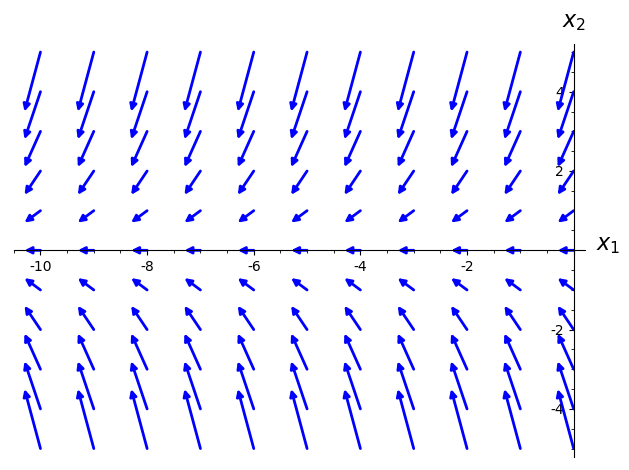

In [150]:
v.plot(scale=0.3,arrowsize=2,steps={x1: 1, x2:1},
       ranges={x1: (-10,0), x2: (-5,5)})

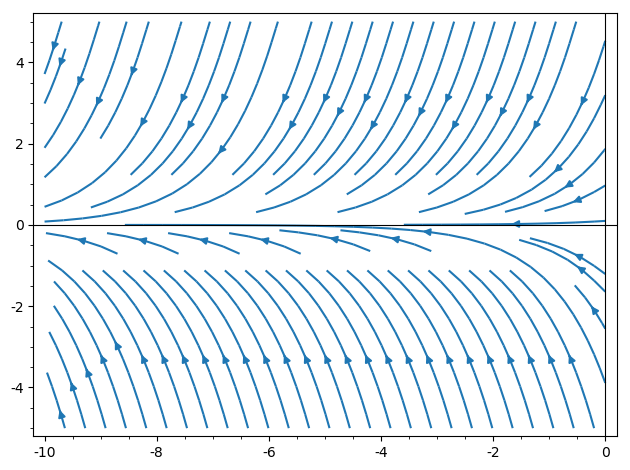

In [151]:
streamline_plot(list(v), (x1, -10, 0), (x2, -5, 5))

In [152]:
h = [[("GEQ", x1+5)]]; h

[[('GEQ', x1 + 5)]]

In [153]:
s = [[("GEQ", x2 + 3), ("LEQ", x2-3),
      ("GEQ", x1 + 5), ("LEQ", x1)]]
s

[[('GEQ', x2 + 3), ('LEQ', x2 - 3), ('GEQ', x1 + 5), ('LEQ', x1)]]

In [154]:
from_cnf(s)

[x2 + 3 >= 0 /\ x2 - 3 <= 0 /\ x1 + 5 >= 0 /\ x1 <= 0]

In [155]:
in_cnf(f,s)

L[1] = -x2 - 3
I = <>
L[2] = x2
I = <-x2 - 3>
L[3] = -x2
I = <-x2 - 3, x2>
L[1] = x2 - 3
I = <>
L[2] = -x2
I = <x2 - 3>
L[3] = x2
I = <x2 - 3, -x2>
L[1] = -x1 - 5
I = <>
L[2] = 1
I = <-x1 - 5>
L[3] = 0
I = <-x1 - 5, 1>
L[1] = x1
I = <>
L[2] = -1
I = <x1>
L[3] = 0
I = <x1, -1>


[[-x2 - 3 <= 0 \/ [-x2 - 3 = 0 /\ x2 <= 0]] /\ [x2 - 3 <= 0 \/ [x2 - 3 = 0 /\ -x2 <= 0]] /\ [-x1 - 5 <= 0 \/ [-x1 - 5 = 0 /\ 1 <= 0]] /\ [x1 <= 0 \/ [x1 = 0 /\ -1 <= 0]]]

In [156]:
lzz(f,h,s)

L[1] = -x1 - 5
I = <>
L[2] = 1
I = <-x1 - 5>
L[3] = 0
I = <-x1 - 5, 1>
L[1] = -x2 - 3
I = <>
L[2] = x2
I = <-x2 - 3>
L[3] = -x2
I = <-x2 - 3, x2>
L[1] = x2 - 3
I = <>
L[2] = -x2
I = <x2 - 3>
L[3] = x2
I = <x2 - 3, -x2>
L[1] = -x1 - 5
I = <>
L[2] = 1
I = <-x1 - 5>
L[3] = 0
I = <-x1 - 5, 1>
L[1] = x1
I = <>
L[2] = -1
I = <x1>
L[3] = 0
I = <x1, -1>
L[1] = -x2 - 3
I = <>
L[2] = x2
I = <-x2 - 3>
L[3] = -x2
I = <-x2 - 3, x2>
L[1] = x2 - 3
I = <>
L[2] = -x2
I = <x2 - 3>
L[3] = x2
I = <x2 - 3, -x2>
L[1] = -x1 - 5
I = <>
L[2] = 1
I = <-x1 - 5>
L[3] = 0
I = <-x1 - 5, 1>
L[1] = x1
I = <>
L[2] = -1
I = <x1>
L[3] = 0
I = <x1, -1>
L[1] = -x1 - 5
I = <>
L[2] = 1
I = <-x1 - 5>
L[3] = 0
I = <-x1 - 5, 1>
[[[[x2 + 3 >= 0 /\ x2 - 3 <= 0 /\ x1 + 5 >= 0 /\ x1 <= 0] /\ x1 + 5 >= 0 /\ [-x1 - 5 <= 0 \/ [-x1 - 5 = 0 /\ 1 <= 0]]] ==> [[-x2 - 3 <= 0 \/ [-x2 - 3 = 0 /\ x2 <= 0]] /\ [x2 - 3 <= 0 \/ [x2 - 3 = 0 /\ -x2 <= 0]] /\ [-x1 - 5 <= 0 \/ [-x1 - 5 = 0 /\ 1 <= 0]] /\ [x1 <= 0 \/ [x1 = 0 /\ -1 <= 0]]]] /\ [[[[-x

True

## Example 74: Lyapunov function

In [162]:
M = Manifold(2,"M")
X.<x1,x2> = M.chart()
f = M.vector_field(name="\partial_f")
f[:] = -x1, -x2
f.display()

\partial_f = -x1 d/dx1 - x2 d/dx2

In [164]:
V = M.scalar_field(x1**2 + x2**2, name="V")
V.display()

V: M --> R
   (x1, x2) |--> x1^2 + x2^2

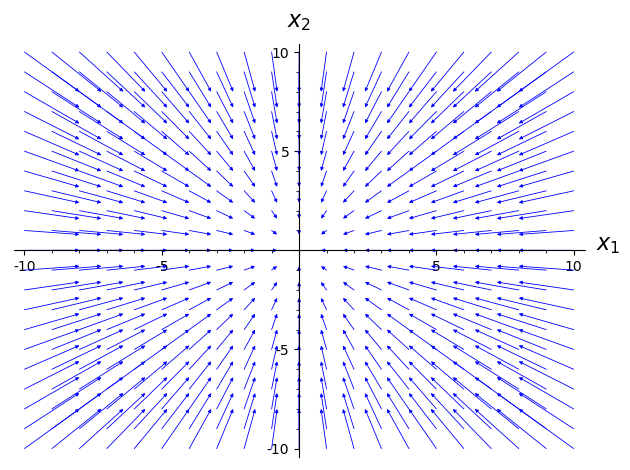

In [193]:
f.plot(scale=0.2,steps={x1: 1, x2: 1},
       ranges={x1: (-10,10), x2: (-10,10)},
       width=0.6, head=1, arrowsize=1)

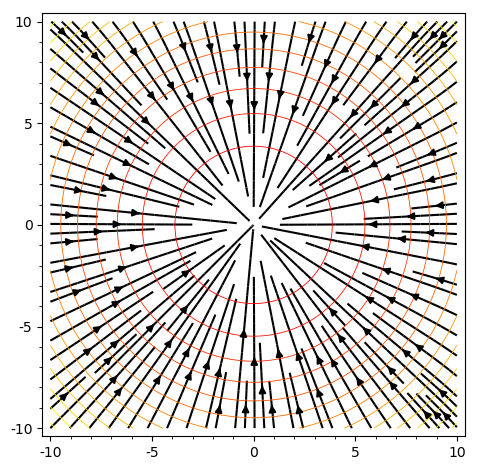

In [242]:
g = Graphics()
g += streamline_plot(list(f), (x1, -10, 10), (x2, -10, 10), density=1.5,
                     color="black")
g += contour_plot(V.expr(), (x1, -10, 10), (x2, -10, 10), fill=False,
                  cmap="autumn", linewidths=0.6,contours=15)
g

In [244]:
plot3d(V.expr(), (x1, -10, 10), (x2, -10, 10))

Graphics3d Object

In [248]:
plot3d(V.expr(),(x1,-1,1),(x2,-1,1)).show()

Graphics3d Object

In [245]:
V.plot()

AttributeError: 'DiffScalarFieldAlgebra_with_category.element_class' object has no attribute 'plot'

In [348]:
R.<x1,x2> = QQ[]

In [349]:
V = R**2

In [350]:
e1,e2 = V.basis()

In [351]:
e1,e2

((1, 0), (0, 1))

In [352]:
f = x1*e1 + x2*e2

In [353]:
def grad(p):
    return diff(p,x1)*e1 + diff(p,x2)*e2

In [354]:
def lie(p,f):
    return grad(p)*f

In [355]:
lie(x1*x2, f)

2*x1*x2

In [356]:
L.<a1,a2,a3>= R[]

In [357]:
R

Multivariate Polynomial Ring in x1, x2 over Rational Field

In [358]:
L

Multivariate Polynomial Ring in a1, a2, a3 over Multivariate Polynomial Ring in x1, x2 over Rational Field

In [362]:
(x1*x2 + x2*a2).gradient()

[0, x2, 0]